In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

### All functions is placed here.

In [2]:
def download_csv():
    url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ_pun9yMi_ZBozhMigddzafI0Hh32ylWefraFRP2w154-' \
            'JTwAi7jwIGW5oczDp7MdCMgjWCvHt0X6r/pub?gid=95383751&single=true&output=csv'
    return pd.read_csv(url)


def create_colum_taxes(new_column_name, calculation_base_column, calculation_quote_column, data_frame):
    data_frame[new_column_name] = np.around(data_frame[calculation_base_column] * (data_frame[calculation_quote_column] / 100), 3)
    return np.around(np.where(np.around((data_frame[new_column_name] - np.around(data_frame[new_column_name], 2)), 3).abs() == 0.005,
                              np.around((data_frame[new_column_name] + 0.001), 2),
                              data_frame[new_column_name]), 2)


def total_bill(data_frame):
    return (data_frame['valor_tusd']
            + data_frame['valor_te']
            + data_frame['valor_bandeira']
            + data_frame['valor_acrescimos']
            + data_frame['valor_outros']
            - data_frame['valor_descontos'])


def plot_bar_kwh_single_year(year):
    pivot_kwh_mes_mes = pd.pivot_table(energy_data.loc[energy_data['ano'] == year], index='mes', columns='ano', values='kwh_dia', aggfunc='sum')
    pivot_kwh_mes_mes.plot(kind='bar')
    plot_var = plt
    plot_var.xticks(energy_data['mes'].unique() - 1, calendar.month_abbr[1:13], rotation='vertical')
    plot_var.suptitle(f'Comparativo Mes a Mes {year}')
    plot_var.xlabel('Mês')
    plot_var.ylabel('Kwh por dia')
    return pivot_kwh_mes_mes, plot_var

In [3]:
energy_data = download_csv()

In [4]:
energy_data = energy_data.fillna(0)
energy_data['aliquota_icms'] = np.where(energy_data['faixa_icms'] == 2, 25, np.where(energy_data['faixa_icms'] == 1, 12, 0))
taxes_field_list = list([['valor_icms', 'base_icms', 'aliquota_icms'],
                         ['valor_pis', 'base_pis_cofins', 'aliquota_pis'],
                         ['valor_cofins', 'base_pis_cofins', 'aliquota_cofins']])

In [5]:
for tax_type in taxes_field_list:
    energy_data[tax_type[0]] = create_colum_taxes(tax_type[0], tax_type[1], tax_type[2], energy_data.copy())
energy_data['kwh_dia'] = (np.round((energy_data['kwh'] / energy_data['dias_leitura']), 4) / 1000)

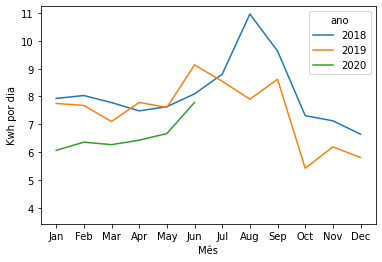

In [6]:
pivot_kwh_mes_ano = pd.pivot_table(energy_data, index='mes', columns='ano', values='kwh_dia', aggfunc='sum')
pivot_kwh_mes_ano.plot()
plt.xticks(energy_data['mes'].unique(), calendar.month_abbr[1:13])
plt.ylim(ymin=(np.min(energy_data['kwh_dia'])) - 2)
plt.xlabel('Mês')
plt.ylabel('Kwh por dia')
plt.show()

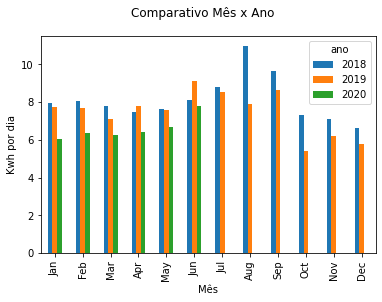

In [7]:
pivot_kwh_mes_ano.plot(kind='bar')
plt.suptitle('Comparativo Mês x Ano')
plt.xticks(energy_data['mes'].unique() - 1, calendar.month_abbr[1:13])
plt.xlabel('Mês')
plt.ylabel('Kwh por dia')
plt.show()

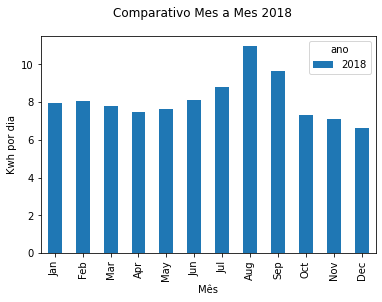

In [8]:
pivot_kwh_mes_mes_2018, plot_print = plot_bar_kwh_single_year(2018)
plot_print.show()

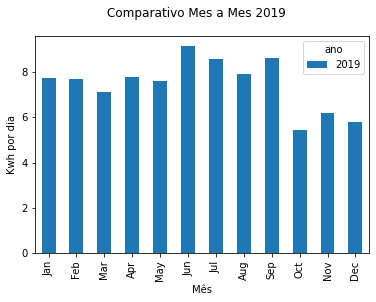

In [9]:
pivot_kwh_mes_mes_2019, plt_print = plot_bar_kwh_single_year(2019)
plot_print.show()

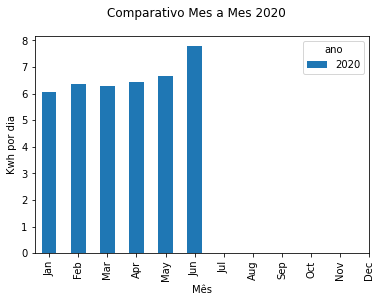

In [10]:
# DONE: Create a graphic for 2020
pivot_kwh_mes_mes_2020, plt_print = plot_bar_kwh_single_year(2020)
plot_print.show()